#### Bayesian Analysis of Population Data

*AM207 2015 - Final Project Analysis*

In [18]:
from IPython.display import Image

We now turn to a Bayesian analysis of the dependence of life expectancy on various factors. The first part of the analysis was to determine which factors correlated most strongly with life expectancy (so which factors provided the best fit for a multilinear model relating life expectancy to the factors), while the second part of the analysis involved attempting to optimize this linear model for predictive power by modelling the error in the model according to various distributions. We investigated 57 different factors which are listed below.  

#----------------Education-------------------------#

1. Public spending on education, total (% of government expenditure) 

2. Public spending on education, total (% of GDP)

3. Expenditure per student, primary (% of GDP per capita) 

4. Expenditure per student, secondary (% of GDP per capita) 

5. Expenditure per student, tertiary (% of GDP per capita)

6. Literacy rate, youth male (% of males ages 15-24) 

7. Literacy rate, youth female (% of females ages 15-24)

8. Literacy rate, adult total (% of people ages 15 and above) 

9. Children out of school, primary, female 

10. Children out of school, primary, male 

11. Trained teachers in primary education (% of total teachers) 

12. Pupil-teacher ratio, primary 

13. Progression to secondary school, female (%)

14. Progression to secondary school, male (%)

15. Ratio of female to male primary enrollment (%)

16. Ratio of female to male tertiary enrollment (%)

#------------------Population------------------------#

17. Population ages 0-14 (% of total)

18. Population ages 15-64 (% of total)

#------------Unemployment rates----------------------#

19. Unemployment, male (% of male labor force) (modeled ILO estimate)

20. Unemployment, female (% of female labor force) (modeled ILO estimate)

21. Employment to population ratio, 15+, total (%) (modeled ILO estimate)

22. Long-term unemployment, male (% of male unemployment)

23. Long-term unemployment, female (% of female unemployment)

24. Labor force, total

25. Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)

26. Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)

27. Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)

28. Vulnerable employment, female (% of female employment)

29. Vulnerable employment, male (% of male employment)

30. Vulnerable employment, total (% of total employment)

#--------------Income distribution-------------------#

31. Income share held by highest 10%

32. Income share held by highest 20%

33. Income share held by lowest 10%

34. Income share held by lowest 20%

35. Poverty gap at \$1.25 a day (PPP) (%)

36. Poverty gap at national poverty lines (%)

37. Poverty headcount ratio at \$1.25 a day (PPP) (% of population)

38. Poverty headcount ratio at national poverty lines (% of population)

39. Rural poverty gap at national poverty lines (%)

40. Rural poverty headcount ratio at national poverty lines (% of rural population)

41. Urban poverty gap at national poverty lines (%)

42. Urban poverty headcount ratio at national poverty lines (% of urban population)

# --------------Crime rates/murder rates------------------------------------#

43. Intentional homicide count and rate per 100,000 population, by country/territory (2000-2012)

44. Percentage of male and female intentional homicide victims, by country/territory, criminal justice source (2000-2012)

45. Intentional homicide count and rate per 100,000 population in the most populous city, by country/territory (2005-2012)

46. Intentional homicide victims killed by gangs or organised criminal groups as percentage of total homicide victims by country/territory (2005-2012)

47. Male and female intentional homicide victims killed by intimate partners or family members as a percentage of total homicide victims, by country/territory

48. Intentional homicide victims killed during commission of a robbery as percentage of total homicide victims, by country/territory (2005-2012)

# -------------- Infrastructure --------------------------------------------#

49. Improved water source, urban (% of urban population with access)

50. Internet users (per 100 people)

# ------------------- Quality of Health System --------------------------------- #

51. Health expenditure per capita (current US\$)

52. Health expenditure, private (% of GDP)

53. Health expenditure, public (% of GDP)

# ----------------- Civic Involvement ------------------------------------------- #

54. Voter turnout, Parliamentary

55. Voting aged population turnout, Parliamentary

56. Voter turnout, Presidential

57. Voting aged population turnout, Presidential


For the initial pass we sought to determine which years we had the most data for. We found:

Year$~~$|$~~$Number of Factors for Which it has the Most Data Points

1990   $\quad$ 5

1991   $\quad$ 3

1999   $\quad$ 1

2000   $\quad$ 4

2001   $\quad$ 3

2002   $\quad$ 6

2004   $\quad$ 6

2005   $\quad$ 4

2006   $\quad$ 2

2007   $\quad$ 1

2008   $\quad$ 7

2009   $\quad$ 5

2010   $\quad$ 9

2011   $\quad$ 3

2012   $\quad$ 1

We therefore performed our analysis with the year 2010. In order to determine which factors best explained the life expectancy we implemented a simulated annealing algorithm. This algorithm used the negative adjusted coefficient of multiple correlation as the energy and had a built in energy cost for when the factors to be fitted had too few overlapping data points. The adjusted coefficient of multiple correlation was used to avoid artificially inflating the coefficient of multiple correlation by including more factors. With this algorithm for the total life expectancy we found R$^2_{\rm adj} = 0.982$ for the factors:   

1. Poverty headcount ratio at \$1.25 a day (PPP) (% of population)
2. Employment to population ratio, 15+, total (%) 
3. Internet users (per 100 people)
4. Literacy rate, youth female (% of females ages 15-24)
5. Labor force participation rate, female (% of female population ages 15+)

For male life expectancy we found the same factors and R$^2_{\rm adj} = 0.966$, while for female life expectancy we found:

1. Health expenditure per capita (current US\$)
2. Literacy rate, youth female (% of females ages 15-24)
3. Poverty gap at \$1.25 a day (PPP) (%)
4. Labor force participation rate, male (% of male population ages 15+)
5. Health expenditure, private (% of GDP)

It should however be noted that the fit associated to these factors included one fewer data point than a corresponding fit for the factors for the total and male life expectancies above (and the adjusted coefficient of multiple correlation was R$^2_{\rm adj}$ = 0.981 versus R$^2_{\rm adj}$ = 0.975, using the same factors as for the total and male life expectancies), so these factors may be the result of a slight overfitting. For contrast, naively listing the top five factors that correlate most strongly with the total life expectancy gives:

1. Poverty headcount ratio at \$1.25 a day (PPP) (% of population)
2. Pupil-teacher ratio, primary
3. Population ages 0-14 (% of total)
4. Poverty gap at \$1.25 a day (PPP) (%)
5. Internet users (per 100 people)

For the total life expectancy the corresponding coefficients of the multilinear fit were:   
1. -0.1158    
2. 0.5176   
3. 0.1830   
4. 0.1748   
5. -0.3231

with an intercept of 37.1024. The corresponding coefficients for the multilinear fit for the male life expectancy were:
1. -0.0578  
2. 0.6218 
3. 0.2179 
4. 0.1616 
5. -0.4045

with an intercept of 32.196. Finally, for females we had: 
1. 0.0052 
2. 0.2370    
3. -0.4523   
4. 0.1949    
5. -0.4239

with an intercept of 38.1701. We computed the fraction of the total, male or female life expectancies explained by a given factor by taking the individual adjusted correlation coeffient between the factor and the appropriate life expectancy dividing by the sum of the adjusted correlation coefficients between all five factors and the appropriate life expectancy and the multiplying by the adjusted coefficient of multiple correlation for the multilinear fit. The result can be found in the figure below. For the sake of comparability the factors used for the female life expectancy were the same as those used for the male and total life expectancy. The figure below that lists the results for female life expectancy using the factors that were found to optimize it. For the sake of comparison, the factors found for the total life expectancy for all the data were:

1. Intentional homicide victims killed during commission of a robbery as percentage of total homicide victims, by country/territory (2005-2012)
2. Male and female intentional homicide victims killed by intimate partners or family members as a percentage of total homicide victims, by country/territory
3. Pupil-teacher ratio, primary
4. Public spending on education, total (% of government expenditure)
5. Long-term unemployment, male (% of male unemployment)
6. Internet users (per 100 people)
7. Expenditure per student, primary (% of GDP per capita)

with R$^2_{\rm adj} = 0.997$ and corresponding coefficients,

1. 0.4833      
2. 3.7434   
3. -0.5148  
4. -0.2332  
5. 0.0158   
6. 0.0353   
7. 0.0294 

and intercept 83.2674.



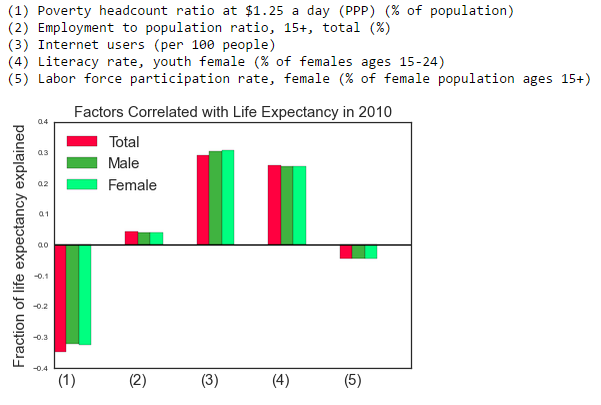

In [21]:
Image(filename='bar_2010_tmf2.png')

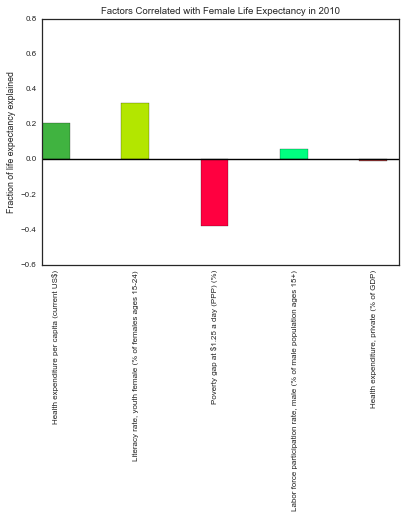

In [19]:
Image(filename='bar_2010_f.png')

To check our simulated annealing algorithm, we also implemented a stochastic gradient descent algorithm. The basic idea is to initialize an array of coefficients $w$ and a learning rate $\alpha$ and then choose a random subset of factors and then for $i = 1,2,...,N$, where $N$ is the total number of data points, update the array of coefficients as, 

$$\beta:= \beta - \alpha\nabla Q_i(\beta),$$

where in our case $Q_i(\beta) = (\beta_0 +\sum_{j=1}^n\beta^j x^j_i - y_i)^2$, where $y_i$ is the $i^{\rm th}$ data point for the total life expectancy in 2010, the $x^j_i$ is the $i^{\rm th}$ data point for the $j^{\rm th}$ factor in 2010 explaining the total life expectancy and the remaining values are coefficients. This is repeated until an approximate minimum is reached. The value for $\alpha$ was $\alpha = 0.001/kN$, where $k$ was the number of times the algorithm has been repeated. We run the entire algorithm for various subsets of the total number of factors and at the end extract the subset that minimized the energy,

$$Q(\beta) = \sum_{i=1}^NQ_i(\beta).$$

We found:

1. Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)
2. Vulnerable employment, total (% of total employment)
3. Internet users (per 100 people)
4. Improved water source, urban (% of urban population with access)
5. Poverty gap at \$1.25 a day (PPP) (%)

with corresponding coefficients:

1. 0.1532   
2. -0.0161    
3. 0.0764    
4. 0.2120   
5. -0.0621

and intercept 39.4748. The adjusted coefficient of multiple correlation was R$^2_{\rm adj} = 0.6$. The factors are roughly similar to those found above but were obtained with only a fraction of the total number of iterations, increasing this number could lead to better agreement. A sample trace plot for the energy in an exploratory run can be found below. It was used to determine the amount of repetitions needed to converge the algorithm and appropriate values of $\alpha$. The energies for actual runs (not using the whole data set) were significantly lower.

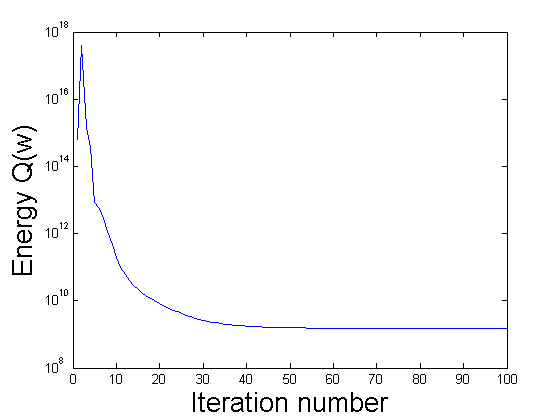

In [20]:
Image(filename='g_descent.png')

For the next stage stage in the analysis we sought to optimize the coefficients of the multilinear fit for predictive power. This was done using different models for the noise in the multilinear fit and different priors for the coefficients. Our fit equation was $y_i = \beta_0 +\sum_{j=1}^n\beta^j x^j_i +\sigma\epsilon_i$, where $y_i$ is the $i^{\rm th}$ data point for the total life expectancy in 2010, the $x^j_i$ is the $i^{\rm th}$ data point for the $j^{\rm th}$ factor in 2010 explaining the total life expectancy, $\epsilon$ gives the iid random noise of the $i^{\rm th}$ data point, $n$ is the number of factors (which in our case we take to be 5) and the remaining values are coefficients to be fitted. The priors were either a flat prior,

$$p(\beta_0,\beta,\sigma^2)\propto 1/\sigma^2,$$

or the 'conjugate' priors, 

$$\beta_0\sim\mathcal{N}(40.0, 0.5^2),\beta_i\sim\mathcal{N}(0.0, 0.5^2),\sigma^2\sim Inv-\chi^2(\nu, s^2),$$

where $\nu=1,2,3,4,5,6$, or $10$ degrees of freedom and the scaling factor is $s^2=1.0$. We allowed the noise to follow, 

$$\epsilon_i \sim \mathcal{N}(0,1) ~~{\rm or}~~ \epsilon_i \sim t_{1,2,3,4,5,6,10}.$$. 

We found that the average (over all data points) length of the $95\%$ confidence interval for the choices of priors and noise distributions were:

Prior$~~~~~~~~$ | $~~~~~~$Noise distribution$~~$ | $~~$Average Length of Confidence Interval

conjugate $\quad\quad$ $t_1$       $~~~~~~~~~~~~~~~~~~\quad\quad\quad\quad$       12.1(1)

conjugate $\quad\quad$   $t_2$     $~~~~~~~~~~~~~~~~~~~\quad\quad\quad\quad$        3.8(3)

flat $~~~~~~\quad\quad\quad$       $t_2$      $~~~~~~~~~~~~~~~~~~~~\quad\quad\quad\quad$        7.14(7)

conjugate $\quad\quad$ $t_3$       $\quad\quad\quad~~~~~~~~~~~~~~~~~~~\quad$        8.1(1)

conjugate $\quad\quad$ $t_4$       $\quad\quad\quad~~~~~~~~~~~~~~~~~~~\quad$        4.9(2)

conjugate $\quad\quad$ $t_5$       $\quad\quad\quad~~~~~~~~~~~~~~~~~~~\quad$        6.5(1)

conjugate $\quad\quad$ $t_6$,      $\quad\quad\quad~~~~~~~~~~~~~~~~~~\quad$        6.6(3)

conjugate $\quad\quad$ $t_7$       $\quad\quad\quad~~~~~~~~~~~~~~~~~~\quad$        7.3(3)

conjugate $\quad\quad$ $t_8$       $\quad\quad\quad~~~~~~~~~~~~~~~~~~\quad$      4.644(4)

conjugate $\quad\quad$ $t_9$       $\quad\quad\quad~~~~~~~~~~~~~~~~~~\quad$      6.6(1)


conjugate $\quad\quad$ $t_{10}$    $\quad\quad\quad~~~~~~~~~~~~~~~~~~\quad$        6.8(2)

conjugate $\quad\quad$ Gaussian    $\quad\quad~~~~~~~~~~~~\quad$        8.4(3)

flat      $~~~~~~\quad\quad\quad$ Gaussian    $\quad~~~~~~~~\quad\quad\quad$        11.8(2)

A very large confidence interval would mean we have very little idea where a $y_i$ point will land given a set of $x^j_i$, so the best prediction is obtained for the pair of prior and noise distribution with the smallest confidence interval. From the table we see that this is the 'conjugate' prior with a $t_2$ distribution. We might have expected it to be the case for the 'conjugate' prior with the $t_6$ distribution since we have 6 fit parameters (an intercept and five coefficients), which suggests that correlation between factors reduced the effective number of degrees of freedom.